## Internet Model

Playground for how to model how the connections within the Internet might be modelled.

## Version 1

Using connections as attributes. And using types to define specific devices.

In [1]:
package InternetModel_v1 {
    part def Data;
    part def Device {
        attribute connType: Connection[1.. * ];
        attribute voltageIn: Electricity[1];
    }
    part def WiFiRouter :> Device {
        attribute wirelessConnection : WirelessConnection[1..2];
        attribute ethernetConnection : CableConnection[1..*];
    }
    part def DSLRouter :> Device {
        attribute dslConnection : CableConnection[1];
        attribute ethernetConnection : CableConnection[1..*];
    }
    part def MobileDevice :> Device {
        doc /** Bluetooth, WiFi, 5G/4G ... so at least 3 wireless connections **/
        attribute wirelessConnection : WirelessConnection[1..3];
    }
    attribute def Connection {
        in item inData: Data;
        out item outData: Data;
    }
    attribute def WirelessConnection :> Connection {
        attribute frequency: SI::FrequencyUnit;
    }
    attribute def CableConnection :> Connection {
        attribute wireCount: ScalarValues::Integer;
    }
    attribute def Electricity {
        attribute voltage: ISQElectromagnetism::ElectricPotentialUnit;
        attribute ampere: ISQElectromagnetism::ElectricCurrentUnit;
    }
}

Package InternetModel_v1 (917e53a2-7344-4887-a7c8-75e5504548d0)


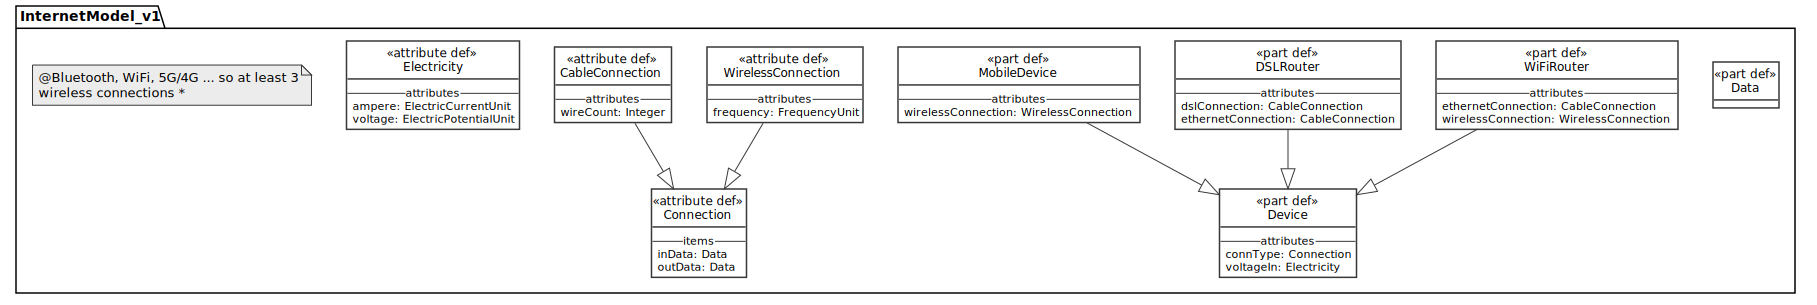

In [2]:
%viz InternetModel_v1

## Version 2

Using Ports to describe the end points of connections while using `connection` for connections between parts. Also using specific parts for specific devices, not part definitions.

In [3]:
package InternetModel_v2 {
    import ISQ::*;
    import SI::*;    
    import SIPrefixes::*;
    import UnitsAndScales::ConversionByPrefix;
    
    attribute GHz: FrequencyUnit = FrequencyUnit(name => "gigahertz", unitConversion => ConversionByPrefix(prefix => giga, referenceUnit => Hz));    
    attribute def StorageUnit;
    attribute def SpeedUnit;
    
    enum def CurrentType {
        enum DC;
        enum AC;
    }
    
    port def DataPort {
        /* TODO: Should all be in terms of Bytes and Bytes/Seconds but for now integers */
        attribute speed : SpeedUnit;
        in attribute inData: ScalarValues::Integer;
        out attribute outData: ScalarValues::Integer;
    }
    
    attribute def ElectricityRating {
        attribute voltage: ISQElectromagnetism::ElectricPotentialUnit;
        attribute ampere: ISQElectromagnetism::ElectricCurrentUnit;
        attribute currentType : CurrentType;
    }
    
    part def Device {
        port dataPorts: DataPort[1..*];
        attribute electricRating: ElectricityRating;
    }
    
    part def Server {
        port dataPorts: DataPort[1..*];
        attribute electricRating: ElectricityRating;
        attribute storage : StorageUnit;
    }
    
    connection def DataConnection {
        end: DataPort[1];
        end: DataPort[1];
    }
    
    connection def CableConnection :> DataConnection {
        attribute wireCount: ScalarValues::Integer;
    }
    
    connection def WirelessConnection :> DataConnection {
        attribute frequency: SI::FrequencyUnit;
    }

    part dslEndpoint : Server {}
    
    part wifiRouter : Device {}
    part dslRouter : Device {}
    part mobileDevice : Device {}
    
    connection : WirelessConnection 
        connect mobileDevice::dataPorts[1]
             to wifiRouter::dataPorts[1] {
       attribute redefines frequency = 5@[GHz];
    }
    
    connection : CableConnection 
        connect dslRouter::dataPorts[1] 
             to dslEndpoint::dataPorts[1] {
       attribute redefines wireCount = 5;
    }
}

Package InternetModel_v2 (d388ebc2-cbdb-4f04-a81d-572ee091fff2)


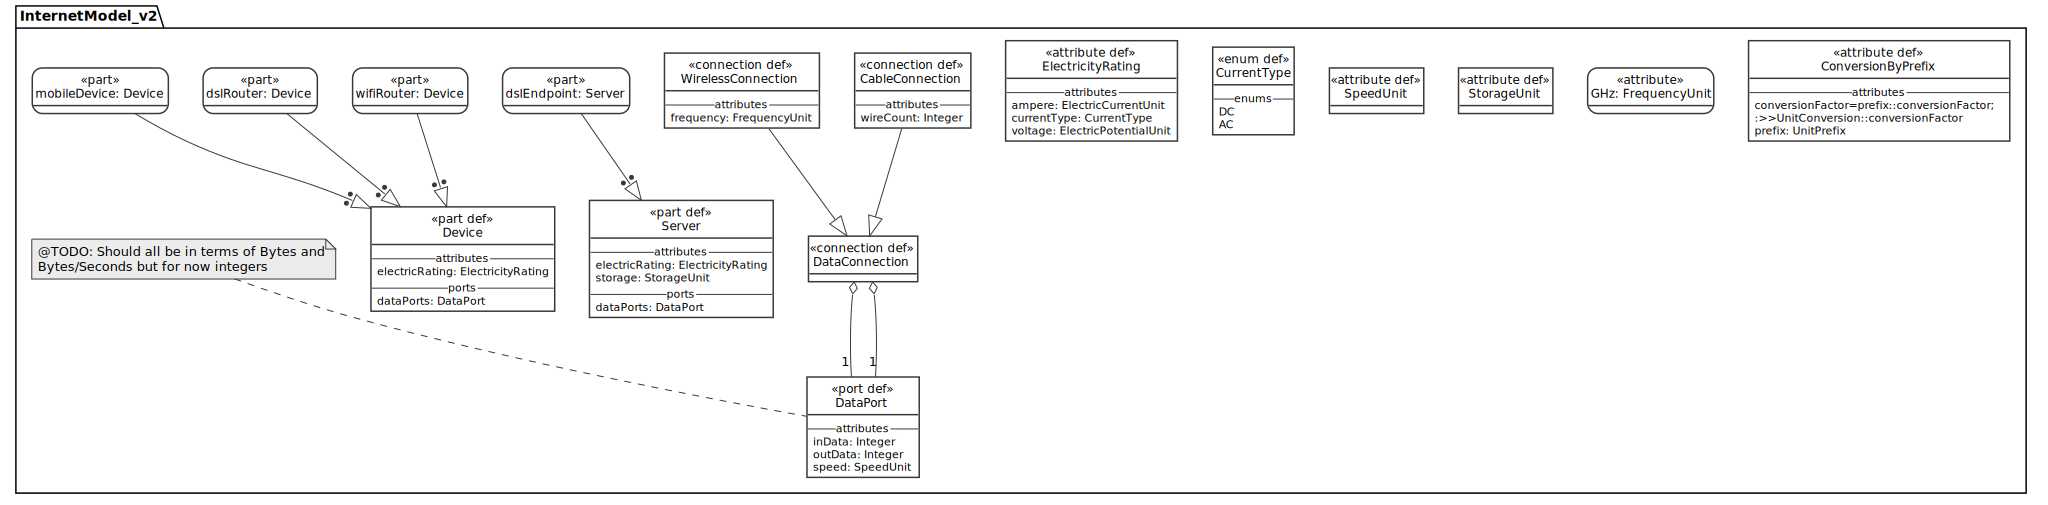

In [4]:
%viz InternetModel_v2